In [1]:
## Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
%matplotlib inline

In [ ]:
## Import the dataset 

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.dropna(inplace=True)   ## Drop NAN Values
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
### Convert Dates to Datetime object and extract the date,month,Hour and min  and drop date of journey ,dep and arrival time as it is of no use

In [3]:
df['Journey_Date']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1, inplace=True)
df.drop(['Date_of_Journey'], axis = 1, inplace = True)
df.drop(['Arrival_Time'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [53]:
## Extract Hours and Mins From Duration

In [5]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [6]:
# Adding duration_hours and duration_mins list to dataframe and drop the column

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(['Duration'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


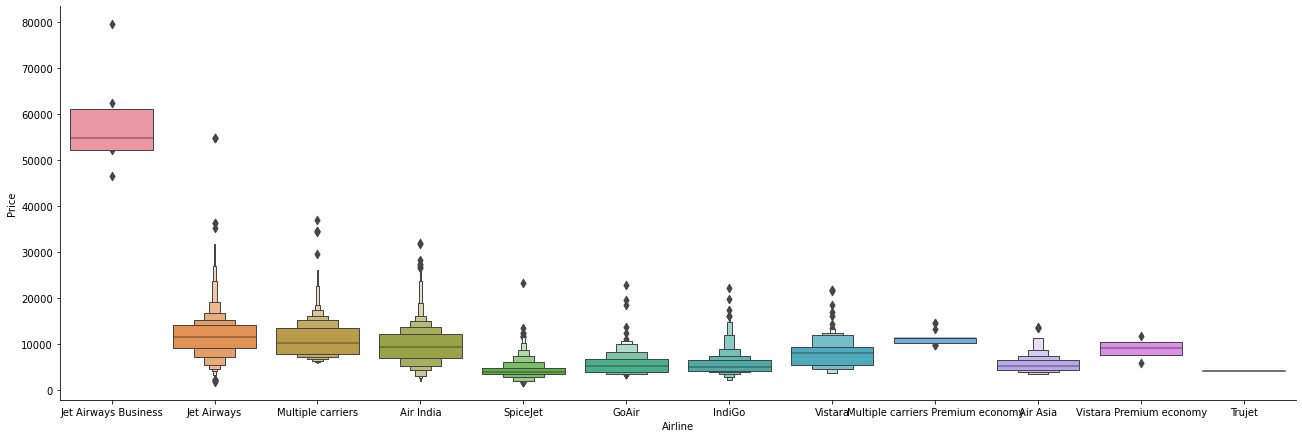

In [7]:
### Plot the data Of price per airline
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)


In [74]:
## Plot Price Per Month

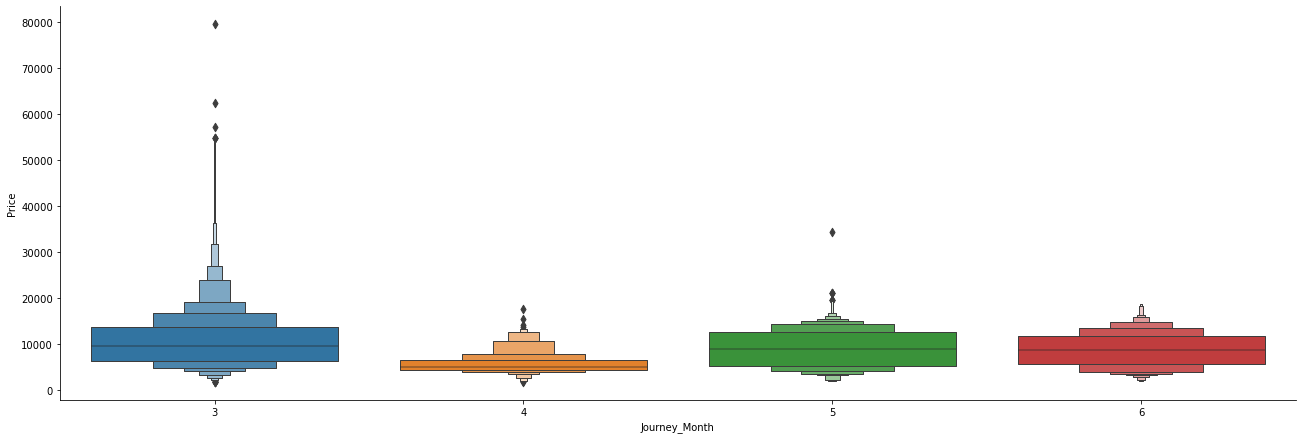

In [8]:
sns.catplot(y = "Price", x = "Journey_Month", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)


In [ ]:
### Plot Price Per Hour

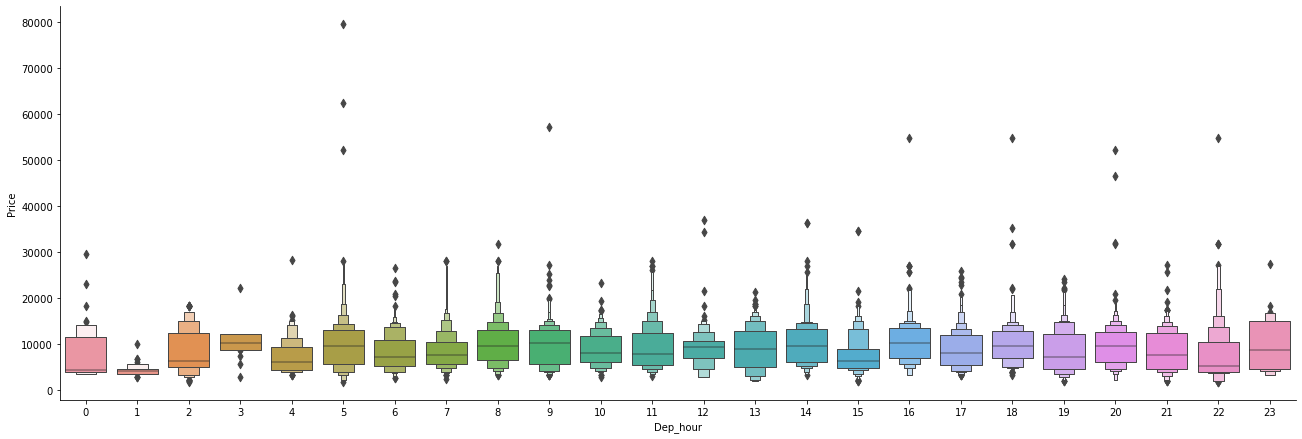

In [9]:
sns.catplot(y = "Price", x = "Dep_hour", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)


In [111]:
## Plot Price Per Source

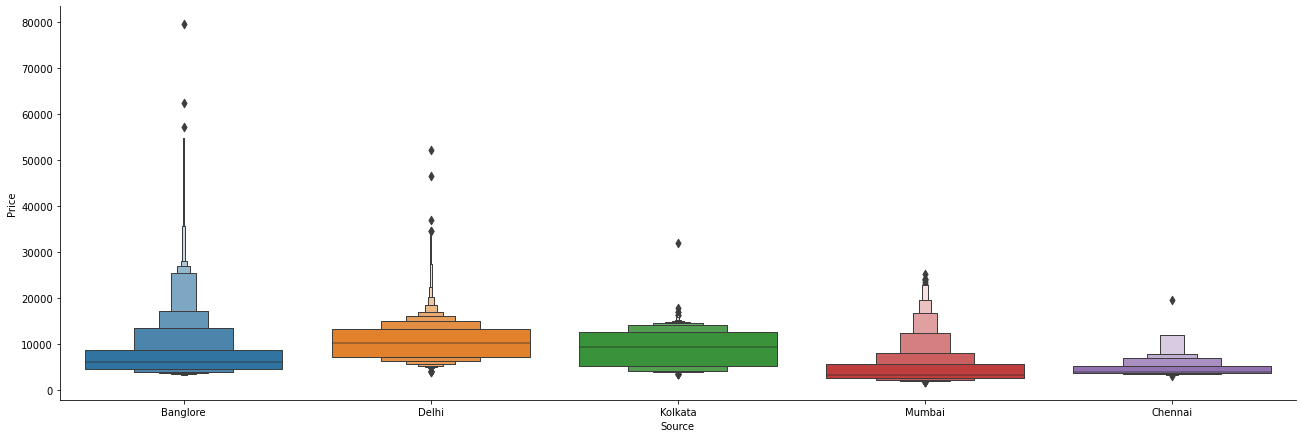

In [10]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)


In [ ]:
### We Will Use One Hot Encoder For Nominal Data and Label Encoder for Ordinal Data

In [11]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()



,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [12]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [13]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [14]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,4,45


In [118]:
## As the Total Stops contains categorical Data we use Label Encoding

In [15]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


In [16]:
data_train = pd.concat([df, Airline, Source, Destination], axis = 1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [17]:
data_train.shape

(10682, 30)

In [162]:
### Import the Data For the testing dataset and perform similar steps

In [18]:
## Importing
df_test=pd.read_excel('Test_set.xlsx')
df_test.dropna(inplace=True)   ## Drop NAN Values
df_test.info()
df_test.head()

# Preprocessing and dropping columns

df_test['Journey_Date']=pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.day
df_test['Journey_Month']=pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.month
df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop(['Dep_Time'],axis=1, inplace=True)
df_test.drop(['Date_of_Journey'], axis = 1, inplace = True)
df_test.drop(['Arrival_Time'], axis = 1, inplace = True)
df_test.head()

## Extract Hours and Mins From Duration
# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding duration_hours and duration_mins list to dataframe and drop the column

df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(['Duration'],axis=1,inplace=True)
df_test.head()

### We Will Use One Hot Encoder For Nominal Data and Label Encoder for Ordinal Data

Airline = df_test[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Source = df_test[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Destination = df_test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


df.head()

df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df_test.head()


df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test.head()


data_test = pd.concat([df, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB


,Total_Stops,Price,Journey_Date,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,7662,1,5,13,15,5,50,7,25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,13882,9,6,4,25,9,25,19,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,12,5,23,30,18,5,5,25,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,13302,1,3,21,35,16,50,4,45,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
X = data_train.loc[:, ['Total_Stops', 'Journey_Date', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [181]:
## Find Correlation Using Heatmap

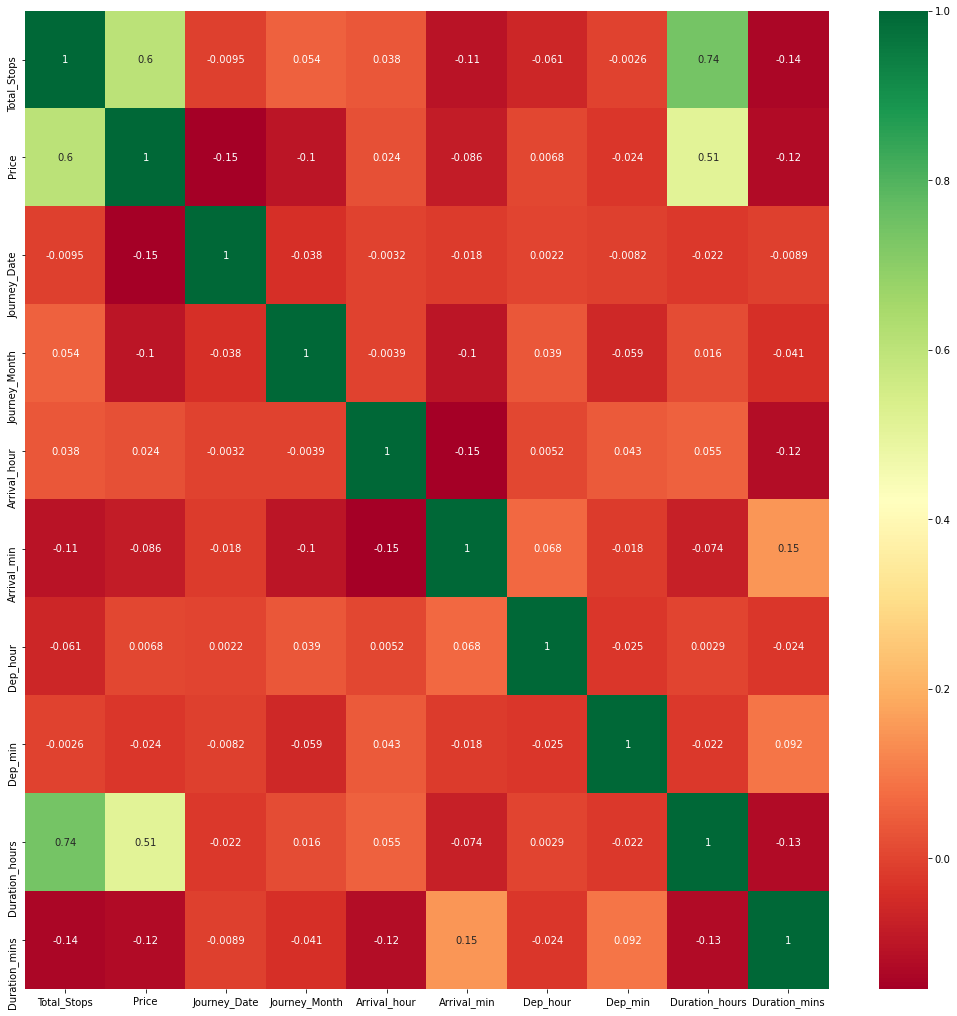

In [21]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
### To Find Out the Important Features we use extra tree regressor


In [22]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [23]:
print(selection.feature_importances_)

[2.14499090e-01 1.43371299e-01 5.43160801e-02 2.42550006e-02
 2.16556713e-02 2.76424042e-02 1.83211582e-02 1.39654229e-01
 1.75652294e-02 1.03284857e-02 1.98544658e-03 1.93697242e-02
 1.34958877e-01 6.71782657e-02 1.75322714e-02 8.52058940e-04
 3.37182850e-03 9.43789285e-05 5.14472545e-03 8.85805413e-05
 4.59721145e-04 1.19766617e-02 3.34284650e-03 5.50299846e-03
 9.56425940e-03 1.39499488e-02 7.93229240e-03 5.69542885e-04
 2.45169229e-02]


In [ ]:
## Plot Important columns

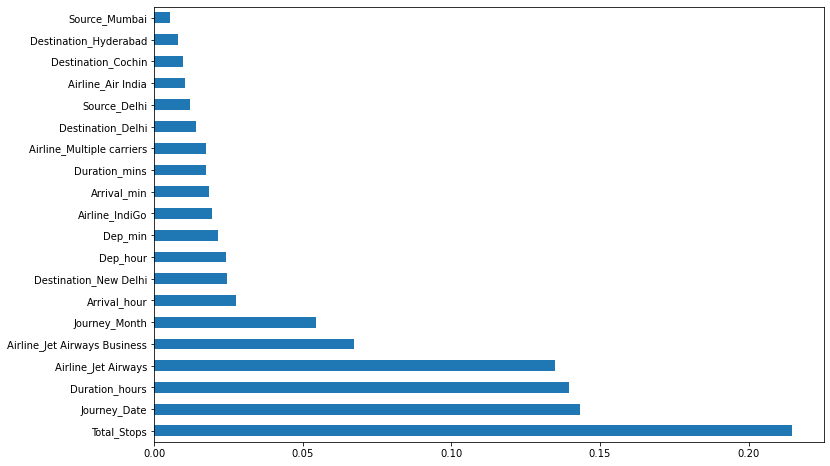

In [24]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [187]:
## We Will Fit the Data Using Random Forest Hence we will import the libraries


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
Reg = RandomForestRegressor()
Reg.fit(X_train, y_train)

RandomForestRegressor()

In [192]:
## Output Scores For Train,Test And Predicted Values

In [29]:
y_pred = Reg.predict(X_test)

In [30]:
Reg.score(X_train, y_train)

0.953200840541147

In [32]:
Reg.score(X_test, y_test)

0.7961868974344478

In [ ]:
## Plot the values of test and predictions

C:\Users\sshabbir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


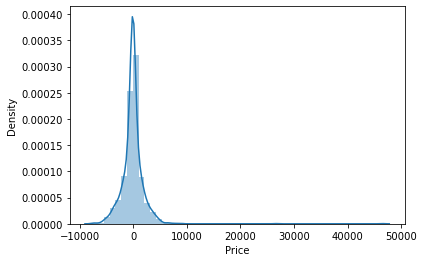

In [33]:
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
## Print Matrix Such As MSE, Classification Report etc


In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.787317599379
MSE: 4394629.597120598
RMSE: 2096.337185931833


In [199]:
## Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [39]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = Reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.3s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.2s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.9s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.9s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.0s
[CV] n_estimators=609, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=40 
[CV]  n_estimators=609, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=40, total=   4.6s
[CV] n_estimators=609, min_samples_split=

[CV]  n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=  22.7s
[CV] n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=  22.6s
[CV] n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=  22.5s
[CV] n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=  22.7s
[CV] n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1372, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=  22.4s
[CV] n_estimators=736, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 227, 354, 481,
                                                         609, 736, 863, 990,
                                                         1118, 1245, 1372,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 481,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 35}

In [44]:
prediction = rf_random.predict(X_test)

C:\Users\sshabbir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


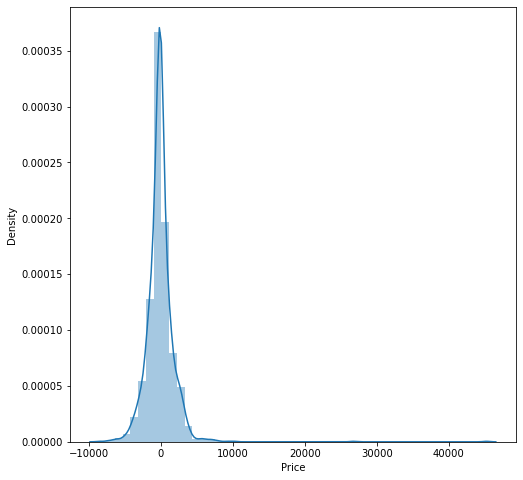

In [45]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

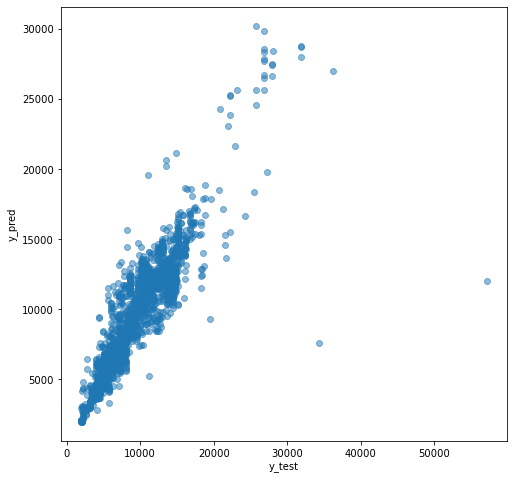

In [46]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.0438261347501
MSE: 4067174.691050007
RMSE: 2016.723751793985
